In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
## impoeting the data from the web
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

In [0]:

## fetching the target and the feature matrix
X,y = mnist['data'],mnist['target']

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [0]:

## plotting the images
def sample_image(index):
  some_digit = X[index]
  some_digit_image = some_digit.reshape(28, 28)
  plt.imshow(some_digit_image,interpolation="nearest")
  print(y[index])

0


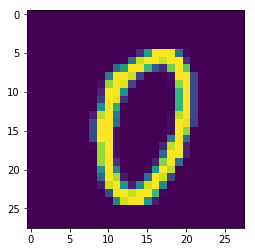

In [7]:
sample_image(1000)

0


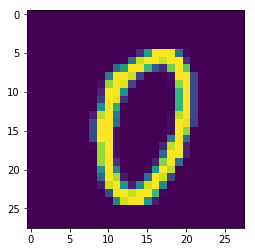

In [8]:
sample_image(1000)

In [0]:
## create train and test dataset
import numpy as np
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]




(-0.5, 27.5, 27.5, -0.5)

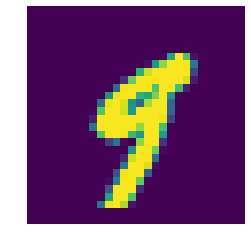

In [10]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image,
           interpolation="nearest")
plt.axis("off")

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train)



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
prediction=sgd_clf.predict(X_test)

In [13]:
## cross validation with cross val score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv=10,scoring='accuracy')

array([0.86979687, 0.87089788, 0.87185469, 0.84966667, 0.85633333,
       0.8768128 , 0.87647941, 0.87614602, 0.86893447, 0.87591728])

In stratified k-fold cross-validation means that each fold contains roughly the same proportions of the two types of class labels.

In [0]:
## each prportion(fold) has the same ratio of the feture and label
from sklearn.model_selection import StratifiedKFold

In [0]:
skfolds = StratifiedKFold(n_splits=3)

In [16]:
skfolds.split(X_train,y_train)

<generator object _BaseKFold.split at 0x7f7bbbbb2fc0>

In [17]:
for item in skfolds.split(X_train,y_train):
  print (len(item[0]))

39996
40001
40003


In [18]:
for item in skfolds.split(X_train,y_train):
  print (len(item[1]))

20004
19999
19997


**STARTIFIED K FOLDS ANOTHER EVALUATION TECNIQUE**

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.8683263347330534
0.8770438521926096
0.8283242486372956


In [20]:
for train_index, test_index in skfolds.split(X_train, y_train):
  print (train_index,test_index)

[19526 19540 19542 ... 59997 59998 59999] [    0     1     2 ... 20519 20529 20533]
[    0     1     2 ... 59997 59998 59999] [19526 19540 19542 ... 40484 40502 40508]
[    0     1     2 ... 40484 40502 40508] [39396 39398 39402 ... 59997 59998 59999]


In [0]:
## using a binary classifier 5  detection
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [22]:
## 5 testing classifier

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.8739
0.96485
0.92065


In [0]:
## three result beacuse we split the data and target divide in three

In [0]:
## doing the same thing with random forest
from sklearn.ensemble import RandomForestClassifier
## now using grid cv to find the best param
forest_clf = RandomForestClassifier()

In [0]:
hyparam_grid = [{'n_estimators':[2,4,5,6],'max_features':[5,4,3,2,3]},{'n_estimators':[10,11,12,3],'max_features':[5,4,3,2,3]}]

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
grid_search = GridSearchCV(forest_clf,hyparam_grid,cv=5,scoring='neg_mean_squared_error')

In [28]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [2, 4, 5, 6], 'max_features': [5, 4, 3, 2, 3]}, {'n_estimators': [10, 11, 12, 3], 'max_features': [5, 4, 3, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
new_clf=grid_search.best_estimator_

In [30]:
new_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(new_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9257648470305939
0.9274463723186159
0.9278391758763814


In [0]:
## much beter

# confusion matrix

In [33]:
## for understanding we gonna use a binary classifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(new_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96995
0.971
0.9719


In [0]:
## its 5 or not
# now confusion matrix
from sklearn.metrics import confusion_matrix

In [0]:
c_m = confusion_matrix(y_test_fold,y_pred)

In [36]:
c_m

array([[18182,    11],
       [  551,  1256]])

18182 = true negative(not 5 and computer says it not)
551 = false negative(5 but computer it is not)
11 = false positive(not 5 but computer says it is 5 )
1256 = true positive( 5 and computer says it is 5 )

In [0]:
#

# precision and recall

In [0]:
# precision = (true_positive)/(true_positive + false_positive)

#it means how good it detect from true detection from (true detection + false detection(false that you call true))

## it means how precise is your ans

# recall = (true positive)/(true positive+ false negative)

#it means how good it detect from true detection from (true detection + false detection(true that you caled false))

## it means how good can you recall the target


In [0]:

#find the precision and target
from sklearn.metrics import precision_score,recall_score